# Eclat Learning

Eclat (Equivalence Class Clustering and bottom-up Lattice Traversal) is another popular algorithm in machine learning for mining frequent itemsets, particularly useful in large datasets. Unlike the Apriori algorithm, Eclat doesn't generate candidate itemsets explicitly. Instead, it uses a depth-first search strategy to traverse a lattice structure representing itemsets, making it more efficient in terms of memory usage and runtime. Eclat works by constructing a vertical representation of the dataset, where each item is associated with the transactions it appears in. Then, it recursively combines itemsets based on their intersection, effectively identifying frequent itemsets without the need for generating candidate sets. Once frequent itemsets are found, association rules can be derived, incorporating measures such as support, confidence, and lift to assess the strength of the associations. Overall, Eclat offers a scalable and efficient approach to mining frequent itemsets, making it suitable for large-scale transactional datasets commonly encountered in real-world applications like market basket analysis and recommendation systems.

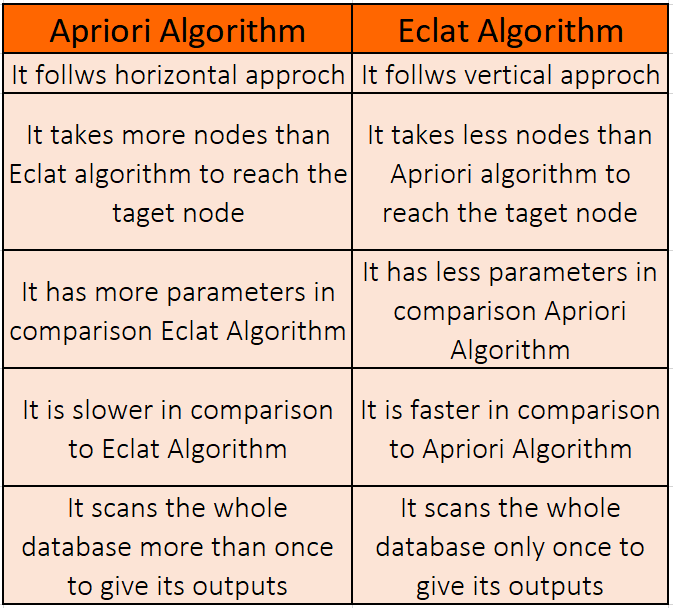

## Importing the libraries

In [0]:
!pip install apyori

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

In [0]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
transactions = []
for i in range(0, 7501):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

## Training the Eclat model on the dataset

In [0]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

## Visualising the results

### Displaying the first results coming directly from the output of the apriori function

In [0]:
results = list(rules)

In [0]:
results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

### Putting the results well organised into a Pandas DataFrame

In [0]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    return list(zip(lhs, rhs, supports))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Product 1', 'Product 2', 'Support'])

### Displaying the results sorted by descending supports

In [0]:
resultsinDataFrame.nlargest(n = 10, columns = 'Support')

,Product 1,Product 2,Support
4,herb & pepper,ground beef,0.015998
7,whole wheat pasta,olive oil,0.007999
2,pasta,escalope,0.005866
1,mushroom cream sauce,escalope,0.005733
5,tomato sauce,ground beef,0.005333
8,pasta,shrimp,0.005066
0,light cream,chicken,0.004533
3,fromage blanc,honey,0.003333
6,light cream,olive oil,0.003200
